# Logistic Regression

### Problem Statement :-

    - Whether the candiate is winning or not in the elections

Importing warnings to avoid warning on the notebook

In [195]:
import warnings
warnings.filterwarnings ('ignore')

Let's import pandas and numpy 

In [196]:
import pandas as pd
import numpy as np

Reading the dataset

In [197]:
election = pd.read_csv("~/desktop/Digi 360/Module 8/Election_data.csv")
election.head()

,Election-id,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN,NaN
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0


### Data Cleaning and Processing

Finding the null values in the dataset

In [198]:
election.isnull().sum()

Election-id        1
Result             1
Year               1
Amount Spent       1
Popularity Rank    1
dtype: int64

In [199]:
#Let's remove the null values in the row

election = election.dropna(0)

In [200]:
#Let's drop `Election-id` since it is not required for our model

election = election.drop(['Election-id'],axis=1)
election.head()

,Result,Year,Amount Spent,Popularity Rank
1,0.0,32.0,3.81,3.0
2,1.0,48.0,6.32,2.0
3,1.0,51.0,3.67,1.0
4,0.0,40.0,2.93,4.0
5,1.0,52.0,3.60,1.0


In [201]:
# Renaming the columns and changing the data type

election = election.rename(columns={'Result':'result','Year':'year','Amount Spent':'amt_spnt','Popularity Rank':'rank'})

In [202]:
election.columns

Index(['result', 'year', 'amt_spnt', 'rank'], dtype='object')

In [203]:
election['result'] = election['result'].astype(int)
election['rank'] = election['rank'].astype(int)
election['year'] = election['year'].astype(int)

Let's see the datatypes of dataset whether all are with proper datatype

In [204]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 4 columns):
result      10 non-null int64
year        10 non-null int64
amt_spnt    10 non-null float64
rank        10 non-null int64
dtypes: float64(1), int64(3)
memory usage: 400.0 bytes


In [205]:
election.head()

,result,year,amt_spnt,rank
1,0,32,3.81,3
2,1,48,6.32,2
3,1,51,3.67,1
4,0,40,2.93,4
5,1,52,3.60,1


In [206]:
election.shape

(10, 4)

Let's describe the dataset how the data is distributed in the range

In [207]:
election.describe()

,result,year,amt_spnt,rank
count,10.000000,10.000000,10.000000,10.000000
mean,0.600000,43.300000,4.229000,2.700000
std,0.516398,6.912951,1.055351,1.159502
min,0.000000,32.000000,2.930000,1.000000
25%,0.000000,39.250000,3.617500,2.000000
50%,1.000000,43.000000,4.005000,3.000000
75%,1.000000,49.500000,4.470000,3.750000
max,1.000000,52.000000,6.320000,4.000000


By looking at the max values, we can clearly see there are no outliers.

### Feature Scaling

SInce there are some features are distributes to high ranges compared to binary varibles, let's do scaling using normalization

In [208]:
from sklearn.preprocessing import StandardScaler

In [214]:
scaler = StandardScaler()

election[['year', 'amt_spnt', 'rank']] = scaler.fit_transform(election[['year', 'amt_spnt', 'rank']])

election.head(10)

,result,year,amt_spnt,rank
1,0,-1.723034,-0.418500,0.272727
2,1,0.716660,2.088507,-0.636364
3,1,1.174102,-0.558333,-1.545455
4,0,-0.503187,-1.297451,1.181818
5,1,1.326583,-0.628250,-1.545455
6,0,-1.265591,-0.028965,1.181818
7,1,-0.655668,1.429294,-0.636364
8,1,-0.198225,0.090891,0.272727
9,1,0.106737,-0.967845,0.272727
10,0,1.021622,0.290653,1.181818


### Checking the collinearity

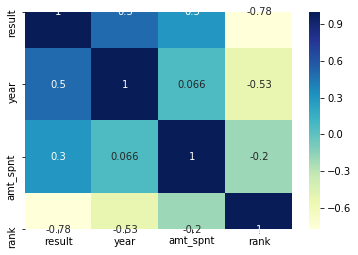

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = election.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

plt.show()

In [223]:
X = election.drop(['result'], axis = 1)
X.head()

,year,amt_spnt,rank
1,-1.723034,-0.418500,0.272727
2,0.716660,2.088507,-0.636364
3,1.174102,-0.558333,-1.545455
4,-0.503187,-1.297451,1.181818
5,1.326583,-0.628250,-1.545455


In [224]:
y = election['result']
y.head()

1    0
2    1
3    1
4    0
5    1
Name: result, dtype: int64

In [225]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Building the first model

In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [229]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions

In [233]:
y_pred = logisticRegr.predict(X_test)

### Accuracy

In [236]:
from sklearn import metrics 
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

33.33333333333333

So Model Accuracy is 33%.

### Conclusion

So, Our model predicted the winning of a candiate in election with 33% accuracy.